In [6]:
import yfinance as yf
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [12]:
start = datetime(2000, 1, 3)
end = datetime(2024, 1, 1)

stocks = ['MSFT', '^GSPC', 'BTC-USD', 'AAPL']
datasets = []

for stock in stocks:
    data = yf.download(stock, start=start, end=end)
    adj_close = data['Adj Close']
    log_returns = np.log(adj_close / adj_close.shift(1))
    log_returns = log_returns.rename(stock).dropna()
    datasets.append({
        'start': str(log_returns.index[0]),
        'target': log_returns.to_list()
    })
    output_file_path = f'datasets/{stock.lower()}_dataset.jsonl'
    with open(output_file_path, 'w') as file:
        for item in datasets[-1:]:
            file.write(json.dumps(item) + '\n')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
import os

input_directory = 'datasets/'
individual_files = [file for file in os.listdir(input_directory) if file.endswith('_dataset.jsonl')]

combined_dataset = ''
for file in individual_files:
    with open(input_directory + file, 'r') as f:
        data = f.read().strip()
        combined_dataset += data + '\n'
output_file_path = 'datasets/all_stocks_dataset.jsonl'
with open(output_file_path, 'w') as file:
    file.write(combined_dataset)


[*********************100%%**********************]  1 of 1 completed


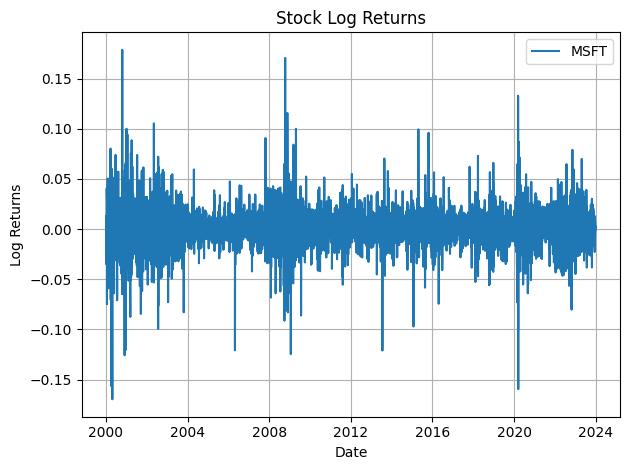

[*********************100%%**********************]  1 of 1 completed


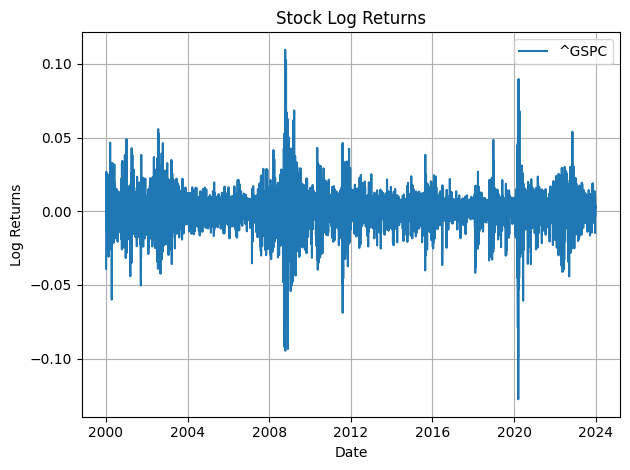

[*********************100%%**********************]  1 of 1 completed


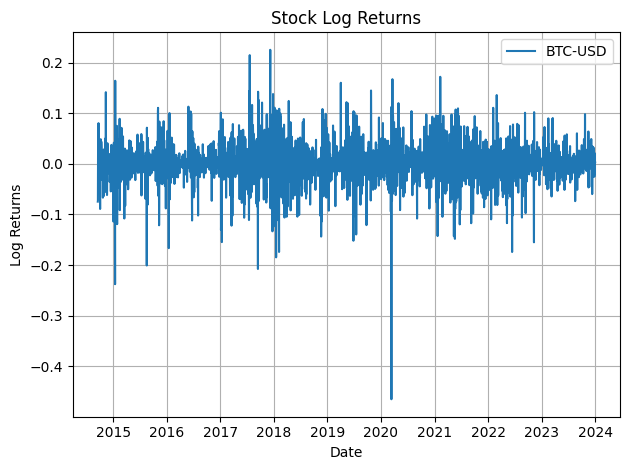

[*********************100%%**********************]  1 of 1 completed


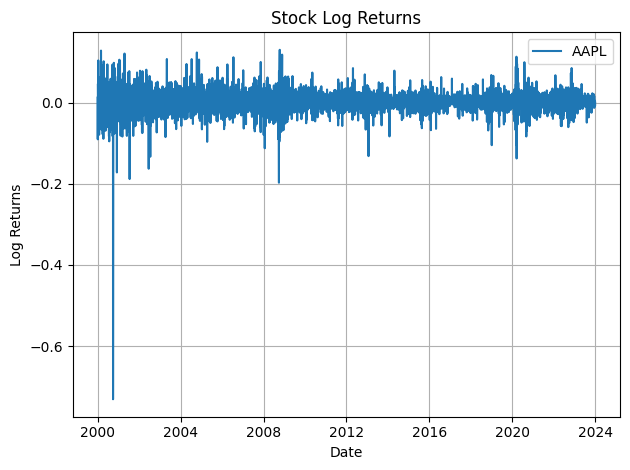

In [14]:
import yfinance as yf
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Download data for each stock
stocks = ['MSFT', '^GSPC', 'BTC-USD', 'AAPL']
for stock in stocks:
    data = yf.download(stock, start=start, end=end)
    adj_close = data['Adj Close']
    log_returns = np.log(adj_close / adj_close.shift(1))
    log_returns = log_returns.rename(stock).dropna()

    # Plot and display the dataset
    plt.plot(log_returns.index, log_returns.values, label=stock)
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.title('Stock Log Returns')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
plt.style.use('seaborn')

/tmp/ipykernel_10049/2955780531.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [21]:
# real = np.load('results/tstr_log-1/real_samples.npy')
# synth = np.load('results/tstr_log-1/synth_samples.npy')

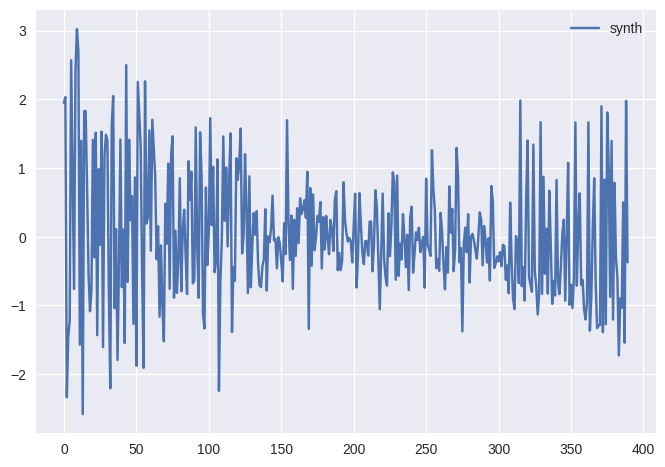

In [28]:
# plt.plot(real[567], label='real')
# plt.plot(synth[731], label='synth')
# plt.legend()

In [41]:
real = np.load('results/tstr_log-4/real_samples.npy')
synth = np.load('results/tstr_log-4/synth_samples.npy')

In [42]:
real.shape

(10000, 530)

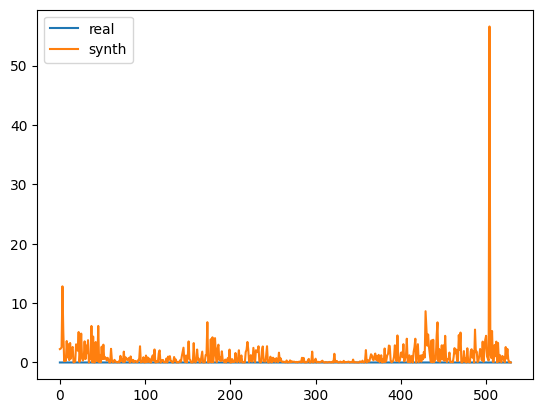

In [43]:
plt.plot(real[0]**2, label='real')
plt.plot(synth[0]**2, label='synth')
plt.legend()

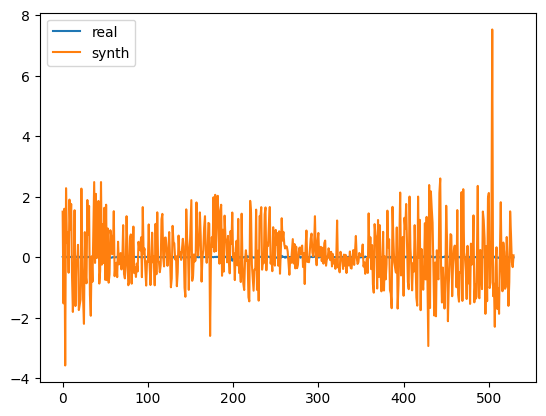

In [44]:
plt.plot(real[0], label='real')
plt.plot(synth[0], label='synth')
plt.legend()

(array([  1.,   0.,   0.,   0.,   1.,  21., 163., 296.,  42.,   6.]),
 array([-0.12076889, -0.10393881, -0.08710873, -0.07027865, -0.05344857,
        -0.03661849, -0.01978841, -0.00295833,  0.01387175,  0.03070183,
         0.04753191]),
 <BarContainer object of 10 artists>)

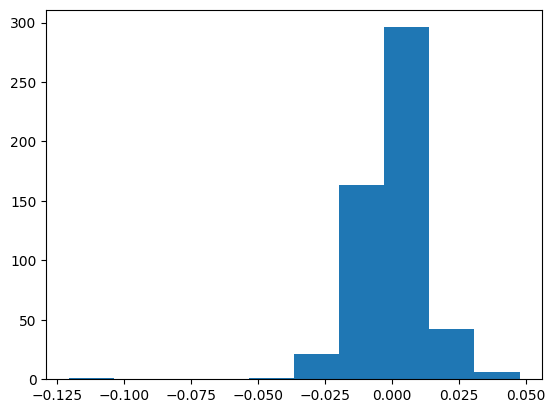

In [45]:
plt.hist(real[0], label='real')

(array([  3.,  33., 155., 236.,  83.,  19.,   0.,   0.,   0.,   1.]),
 array([-3.58156157, -2.47107673, -1.36059189, -0.25010705,  0.86037779,
         1.97086263,  3.08134747,  4.19183254,  5.30231714,  6.41280174,
         7.52328682]),
 <BarContainer object of 10 artists>)

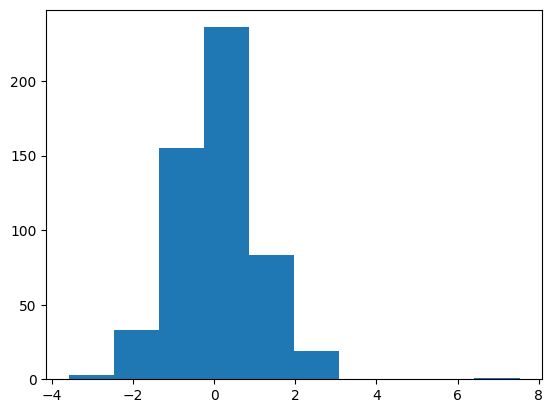

In [46]:
plt.hist(synth[0], label='synth')


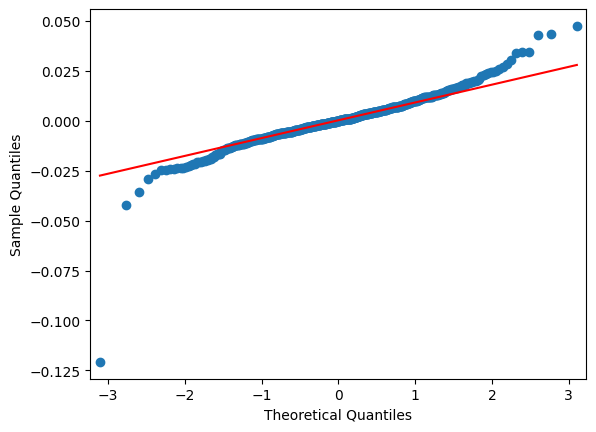

In [47]:
sm.qqplot(real[0], line='q', a=1/2)
pylab.show()


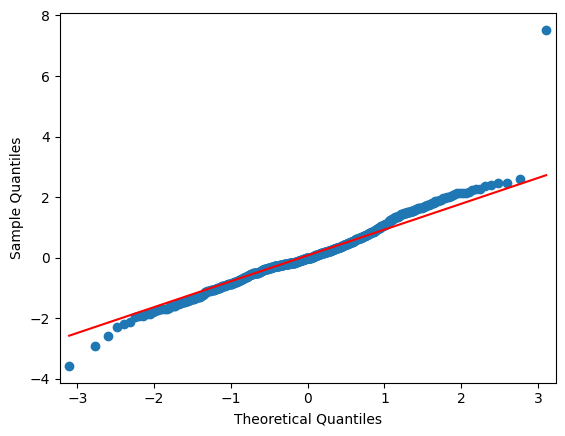

In [48]:
sm.qqplot(synth[0], line='q', a=1/2)
pylab.show()

In [49]:

mean_ret = np.mean(real[0])
std_dev_ret = np.std(real[0])
skewness_ret = skew(real[0])
kurtosis_ret = kurtosis(real[0])  # This function returns excess kurtosis by default

print("Sample Mean:", mean_ret)
print("Sample Standard Deviation:", std_dev_ret)
print("Sample Skewness:", skewness_ret)
print("Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(real[0])
print("Jarque-Bera test statistic:", jb_test.statistic)
print("Jarque-Bera test p-value:", jb_test.pvalue)


Sample Mean: 0.0002268214
Sample Standard Deviation: 0.012092518
Sample Skewness: -1.616610250763071
Sample Kurtosis: 19.222134497792243
Jarque-Bera test statistic: 8390.433742301371
Jarque-Bera test p-value: 0.0


In [50]:
mean_ret = np.mean(synth[0])
std_dev_ret = np.std(synth[0])
skewness_ret = skew(synth[0])
kurtosis_ret = kurtosis(synth[0])  # This function returns excess kurtosis by default

print("Sample Mean:", mean_ret)
print("Sample Standard Deviation:", std_dev_ret)
print("Sample Skewness:", skewness_ret)
print("Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(synth[0])
print("Jarque-Bera test statistic:", jb_test.statistic)
print("Jarque-Bera test p-value:", jb_test.pvalue)

Sample Mean: 0.077660285
Sample Standard Deviation: 1.0215784
Sample Skewness: 0.7687688480707026
Sample Kurtosis: 4.924235831443171
Jarque-Bera test statistic: 587.6843319201689
Jarque-Bera test p-value: 2.4320291332228454e-128


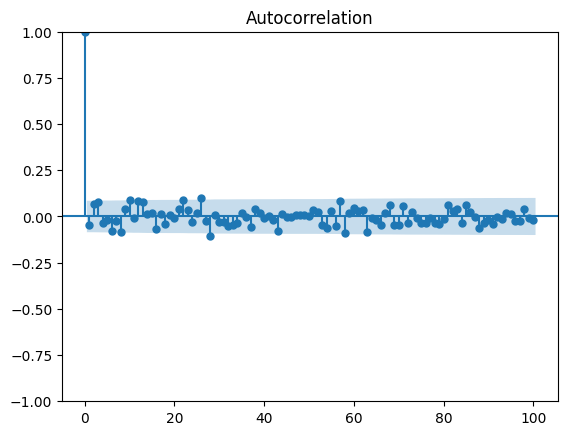

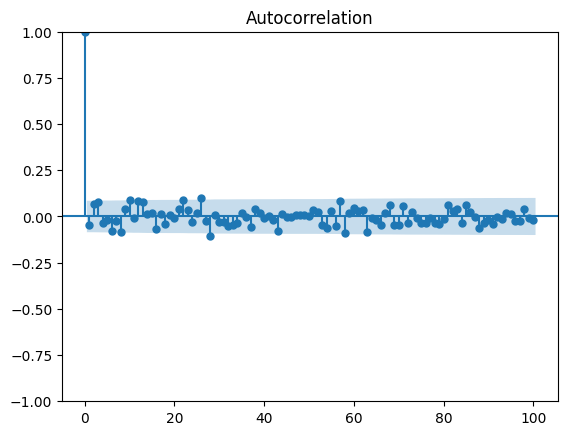

In [51]:
plot_acf(real[0], lags=100)

Jarque-Bera test p-value: 2.4320291332228454e-128


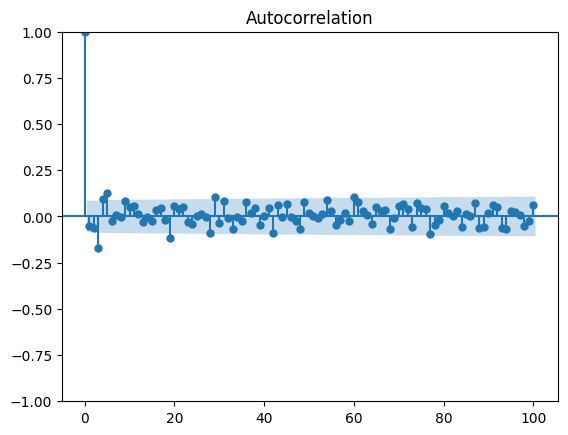

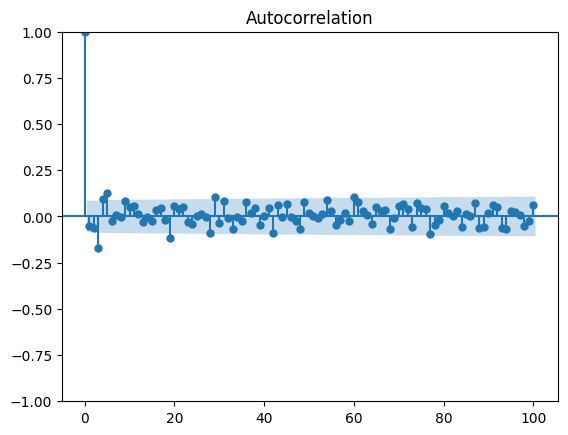

In [52]:
print("Jarque-Bera test p-value:", jb_test.pvalue)


plot_acf(synth[0], lags=100)

In [53]:


# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(real[0], lags=10, return_df=True)

# Print the results
for lag in range(1, 11):
    print(f"Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")

Lag: 1, Statistic: 1.0149472450409596, p-value: 0.31372054244436465
Lag: 2, Statistic: 3.259223955389918, p-value: 0.1960056139235023
Lag: 3, Statistic: 6.552941655892915, p-value: 0.08759783635226036
Lag: 4, Statistic: 7.273489540805566, p-value: 0.12212230841232993
Lag: 5, Statistic: 7.417408288633384, p-value: 0.19140127720931382
Lag: 6, Statistic: 10.70159217957315, p-value: 0.09804865244370727
Lag: 7, Statistic: 11.018216839376874, p-value: 0.13782638264817487
Lag: 8, Statistic: 14.613902792903207, p-value: 0.06710220313962628
Lag: 9, Statistic: 15.61261610556717, p-value: 0.07542527480779639
Lag: 10, Statistic: 19.70426340972463, p-value: 0.03217725628061855


In [54]:

# Calculate Ljung-Box Q statistic for lags 1 to 10
results = acorr_ljungbox(synth[0], lags=10, return_df=True)

# Print the results
for lag in range(1, 11):
    print(f"Lag: {lag}, Statistic: {results.loc[lag, 'lb_stat']}, p-value: {results.loc[lag, 'lb_pvalue']}")



Lag: 1, Statistic: 1.3461614340087675, p-value: 0.24595030270330764
Lag: 2, Statistic: 3.5964616435451946, p-value: 0.16559159026033285
Lag: 3, Statistic: 19.20964076771318, p-value: 0.0002474226826788557
Lag: 4, Statistic: 24.159507364090604, p-value: 7.420432153009147e-05
Lag: 5, Statistic: 32.63235804533537, p-value: 4.451933215664725e-06
Lag: 6, Statistic: 32.89855702749276, p-value: 1.0967763756540242e-05
Lag: 7, Statistic: 32.940910626245405, p-value: 2.7155972532704833e-05
Lag: 8, Statistic: 32.94741248576081, p-value: 6.294650335241932e-05
Lag: 9, Statistic: 36.88662139256136, p-value: 2.7572951159908078e-05
Lag: 10, Statistic: 38.22033389872165, p-value: 3.4741741939842685e-05


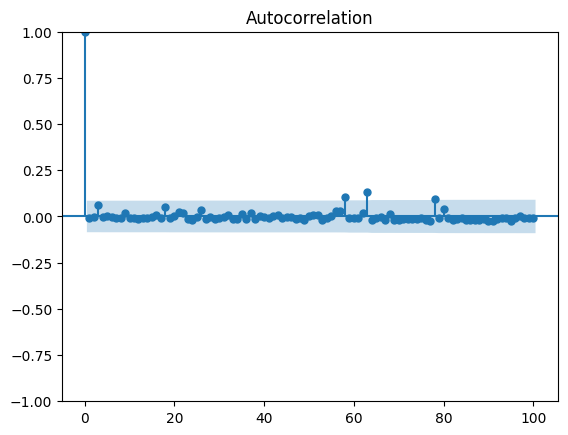

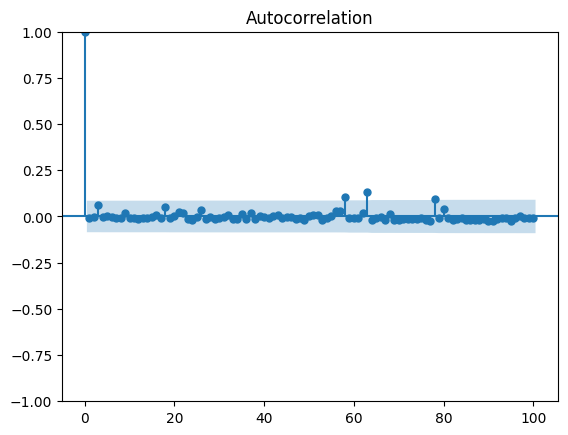

In [55]:
plot_acf(real[0]**2, lags=100)

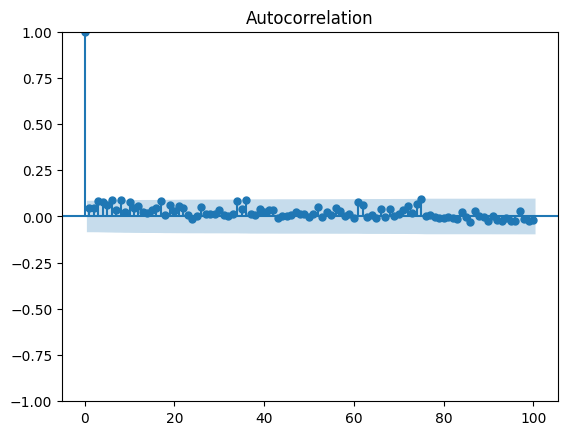

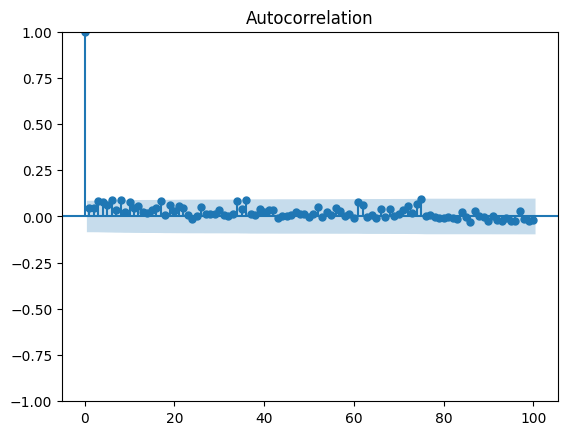

In [56]:
plot_acf(synth[0]**2, lags=100)

In [57]:
synth.shape

(10000, 530)